In [1]:
from __future__ import print_function
import matplotlib     # These are needed to run
matplotlib.use("Agg") # the code headless.

import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from numpy import interp
from sklearn.metrics import roc_curve, roc_auc_score
import scipy
import datetime
%matplotlib inline

In [5]:
ssa = []
tft = []

ssa.append(np.loadtxt("../logs/2017-07-31_13:19:00_3d-2channel-realdata-acc_0-of-4.log", delimiter=","))
ssa.append(np.loadtxt("../logs/2017-07-31_13:20:00_3d-2channel-realdata-acc_1-of-4.log", delimiter=","))
ssa.append(np.loadtxt("../logs/2017-07-31_13:20:00_3d-2channel-realdata-acc_2-of-4.log", delimiter=","))
ssa.append(np.loadtxt("../logs/2017-07-31_13:21:00_3d-2channel-realdata-acc_3-of-4.log", delimiter=","))
ssa.append(np.loadtxt("../logs/2017-07-31_13:22:00_3d-2channel-realdata-acc_4-of-4.log", delimiter=","))
ssa = np.transpose(np.array(ssa))

tft.append(np.loadtxt("../logs/2017-07-31_13:19:00_3d-2channel-realdata-roc_0-of-4.log", delimiter=","))
tft.append(np.loadtxt("../logs/2017-07-31_13:20:00_3d-2channel-realdata-roc_1-of-4.log", delimiter=","))
tft.append(np.loadtxt("../logs/2017-07-31_13:20:00_3d-2channel-realdata-roc_2-of-4.log", delimiter=","))
tft.append(np.loadtxt("../logs/2017-07-31_13:21:00_3d-2channel-realdata-roc_3-of-4.log", delimiter=","))
tft.append(np.loadtxt("../logs/2017-07-31_13:22:00_3d-2channel-realdata-roc_4-of-4.log", delimiter=","))

Specificity: [ 0.79310346  0.68965518  0.82758617  0.89655173  0.86206895]
Avg: 0.813793098927
Sensitivity: [ 0.24137931  0.24137932  0.20689656  0.20689656  0.13793103]
Avg: 0.206896555424
ROC AUC: [ 0.53864447  0.53388823  0.54102259  0.55231867  0.55410226]
Avg: 0.543995243757


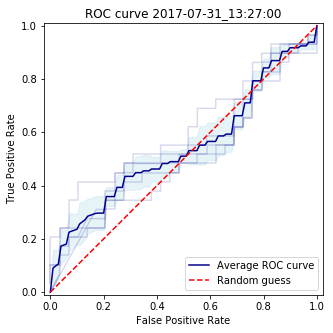

In [8]:
k = 5

dt = str(datetime.datetime.now().replace(second=0, microsecond=0).isoformat("_"))

plt.figure(figsize=(5, 5))

tprs = []

base_fpr = np.linspace(0, 1, 101)

for i in np.arange(k):
    fpr = tft[i][0]
    tpr = tft[i][1]
    plt.plot(fpr, tpr, alpha=0.15, color="darkblue")
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

tprs = np.array(tprs)
mean_tprs = tprs.mean(axis=0)
std = tprs.std(axis=0)

tprs_upper = np.minimum(mean_tprs + std, 1)
tprs_lower = mean_tprs - std

plt.plot(base_fpr, mean_tprs, color="darkblue", label="Average ROC curve")
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='lightblue', alpha=0.3)

plt.plot([0, 1], [0, 1],'r--', label="Random guess")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve '+dt)
plt.legend(loc=4)
plt.axes().set_aspect('equal', 'datalim')
#plt.savefig("../figures/rocCurves/"+dt+"-3dCNN2chfakedata.png")

#log = open("../logs/"+dt+"-3dCNN2chfakedata.log","w+")
#strOut = str("Specificity: "+str(ssa[0])+"\nAvg: "+str(np.mean(ssa[0]))+"\nSensitivity: "+str(ssa[1])+"\nAvg: "+str(np.mean(ssa[1]))+"\nROC AUC: "+str(ssa[2])+"\nAvg: "+str(np.mean(ssa[2])))
#log.write(strOut)
#log.close()
print(strOut)